In [23]:
# 超参数
VAULE_Y = '销量（升）'
VAULE_X = '价差'
SIGN_LINER = 0.7 #判断是否线性相关的显著性
SIGN_PVALUE = 0.05 #判断pValue的显著性
COLS_ALL = ['日期', '销量（升）', '石化站价格', '竞争站价格', '价差']

import pandas as pd

# 读取excel文件并获取指定列
df_uncleaned = pd.read_csv('Data/竞争站23年单站32809336.csv', usecols=COLS_ALL)
# 删除包含空值的行
df = df_uncleaned.dropna()
print(df.head())


           日期   销量（升）  石化站价格  竞争站价格    价差
0  2023-07-17   40.06   7.63   7.19  0.44
1  2023-07-18    0.24   7.63   7.19  0.44
2  2023-07-19  239.41   7.63   7.19  0.44
3  2023-07-20  381.09   7.63   7.19  0.44
4  2023-07-21  553.67   7.63   7.19  0.44


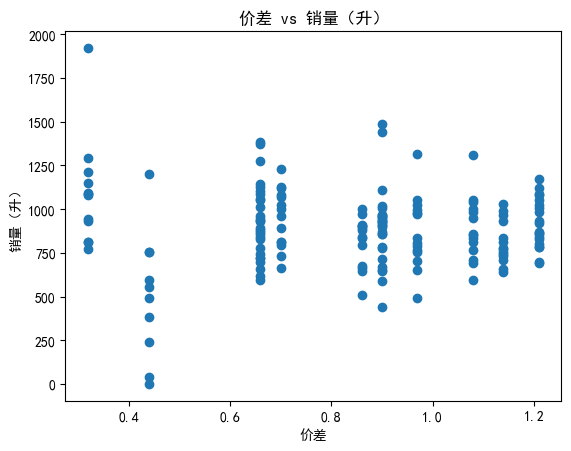

In [24]:
#画出散点图
import matplotlib.pyplot as plt

# 设置字体，确保能正确显示汉字
plt.rcParams['font.sans-serif'] = ['SimHei']  # 设置中文字体

# 绘制散点图
plt.scatter(df[VAULE_X], df[VAULE_Y])

# 添加标题和坐标轴标签
plt.title(VAULE_X+' vs '+VAULE_Y)
plt.xlabel(VAULE_X)
plt.ylabel(VAULE_Y)

# 显示图形
plt.show()

In [28]:
# 计算相关系数
corr = df[VAULE_X].corr(df[VAULE_Y])
print(f'皮尔逊相关系数（假设两者均为正太分布）为：{corr}')
# 判断线性关系强度
if corr > SIGN_LINER:
    print("具有强正向线性关系, 相关系数接近1")
elif corr < -SIGN_LINER:
    print("具有强负向线性关系, 相关系数接近-1")
else:
    print("线性关系强度不足, 相关系数接近0")

皮尔逊相关系数（假设两者均为正太分布）为：-0.017641790084707835
线性关系强度不足, 显著性为 -0.017641790084707835


In [26]:
# 拟合出 两者相关性的线性 函数

# 使用最小二乘法拟合数据
column_x = df[VAULE_X]
column_y = df[VAULE_Y]
import numpy as np
coefficients = np.polyfit(column_x, column_y, 1)

# 提取斜率和截距
slope = coefficients[0]
intercept = coefficients[1]

# 打印拟合出的线性函数的参数
print("斜率:", slope)
print("截距:", intercept)


斜率: -16.020352240093775
截距: 897.5398371219184


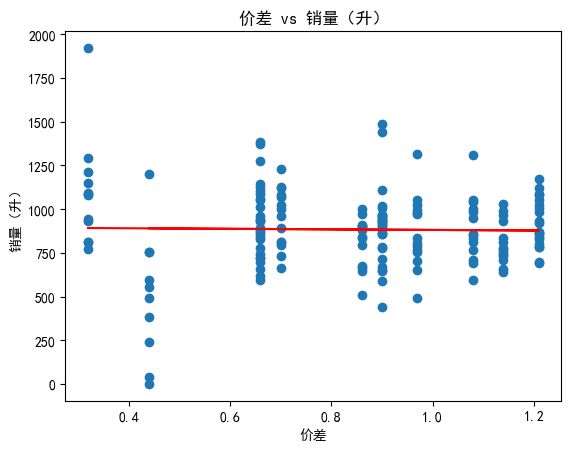

In [27]:
# 在散点图上画出来拟合回归线

# 生成拟合线的数据
x_fit = df[VAULE_X].values.reshape(-1, 1)
y_fit = slope * x_fit + intercept

# 绘制拟合线
plt.plot(x_fit, y_fit, color='red', label='拟合线')

# 绘制散点图
plt.scatter(df[VAULE_X], df[VAULE_Y])

# 添加标题和坐标轴标签
plt.title(VAULE_X+' vs '+VAULE_Y)
plt.xlabel(VAULE_X)
plt.ylabel(VAULE_Y)

# 显示图形
plt.show()